<a href="https://colab.research.google.com/github/govardhanspace/ML-DL-Projects/blob/main/Predicting_Next_Day_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Next day Rainfall in Australia**

## **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://github.com/govardhanspace/Datasets/raw/main/Weather%20Australia.csv')

In [3]:
df_copy = df.copy()

### **About the data**

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

## EDA

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [6]:
df.shape

(36881, 24)

In [8]:
# as mentioned in the about the data section, i'm dropping the riskmm column
df.drop('RISK_MM', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RainTomorrow       620
dtype: int64

In [11]:
df.shape

(36881, 23)

In [12]:
df = df.dropna(subset=['RainTomorrow'])

In [14]:
df.shape

(36261, 23)

In [15]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,5/18/2009,Hobart,NW,WSW,SSE,No,No
1,7/3/2009,Launceston,SSW,E,SW,No,No
2,2/18/2010,Williamtown,SSE,SSE,SSE,No,No
3,3/4/2010,PerthAirport,SW,SSE,SW,No,No
4,9/9/2010,GoldCoast,NNW,WNW,N,No,No


**Summary of categorical variables**

* There is a date variable. It is denoted by Date column.
* There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
* There are two binary categorical variables - RainToday and RainTomorrow.
* RainTomorrow is the target variable.

In [17]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date               0
Location           0
WindGustDir     3022
WindDir9am      2614
WindDir3pm       801
RainToday        349
RainTomorrow       0
dtype: int64

In [18]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir    3022
WindDir9am     2614
WindDir3pm      801
RainToday       349
dtype: int64


In [19]:
# view frequency of categorical variables

for var in categorical:

    print(df[var].value_counts())

Date
3/3/2009      41
2/1/2010      40
5/24/2009     40
7/11/2011     40
1/23/2009     39
              ..
6/5/2008       1
1/11/2008      1
3/20/2008      1
11/8/2007      1
11/23/2007     1
Name: count, Length: 1473, dtype: int64
Location
Canberra            1077
Sydney               970
Perth                899
Hobart               892
Darwin               881
Brisbane             879
Adelaide             863
Melbourne            862
Bendigo              811
Ballarat             807
Cairns               805
Albany               802
SydneyAirport        801
Launceston           795
MountGambier         793
AliceSprings         792
Moree                790
Albury               784
Townsville           776
GoldCoast            774
MelbourneAirport     774
Newcastle            773
Mildura              769
Tuggeranong          768
NorahHead            766
CoffsHarbour         764
Woomera              763
Portland             761
Cobar                759
Nuriootpa            756
NorfolkIs

In [20]:
# view distribution of the frequency
for var in categorical:

    print(df[var].value_counts()/float(len(df)))

Date
3/3/2009      0.001131
2/1/2010      0.001103
5/24/2009     0.001103
7/11/2011     0.001103
1/23/2009     0.001076
                ...   
6/5/2008      0.000028
1/11/2008     0.000028
3/20/2008     0.000028
11/8/2007     0.000028
11/23/2007    0.000028
Name: count, Length: 1473, dtype: float64
Location
Canberra            0.029701
Sydney              0.026751
Perth               0.024792
Hobart              0.024599
Darwin              0.024296
Brisbane            0.024241
Adelaide            0.023800
Melbourne           0.023772
Bendigo             0.022366
Ballarat            0.022255
Cairns              0.022200
Albany              0.022117
SydneyAirport       0.022090
Launceston          0.021924
MountGambier        0.021869
AliceSprings        0.021842
Moree               0.021786
Albury              0.021621
Townsville          0.021400
GoldCoast           0.021345
MelbourneAirport    0.021345
Newcastle           0.021318
Mildura             0.021207
Tuggeranong         0.02

**Number of labels: cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [21]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  1473  labels
Location  contains  46  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [22]:
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
for i in categorical:
    print(i, 'has', len(df[i].unique()), 'labels')

Date has 1473 labels
Location has 46 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels
RainTomorrow has 2 labels


**Feature Engineering of Date Variable**

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [25]:
df['Date'].dtypes

dtype('<M8[ns]')

In [26]:
df_copy['Date'].dtypes

dtype('O')

In [27]:
# Extract year month from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [28]:
df['Day'] = df['Date'].dt.day

In [29]:
df[['Date', 'Year', 'Month', 'Day']].head()

,Date,Year,Month,Day
0,2009-05-18,2009,5,18
1,2009-07-03,2009,7,3
2,2010-02-18,2010,2,18
3,2010-03-04,2010,3,4
4,2010-09-09,2010,9,9


In [30]:
df.drop('Date', axis=1, inplace=True)

In [31]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The Date variable has been removed. First, I will check missing values in categorical variables.

In [32]:
df[categorical].isnull().sum()

Location           0
WindGustDir     3022
WindDir9am      2614
WindDir3pm       801
RainToday        349
RainTomorrow       0
dtype: int64

In [33]:
# Exploring Location Variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 46 labels


In [34]:
df.Location.unique()

array(['Hobart', 'Launceston', 'Williamtown', 'PerthAirport', 'GoldCoast',
       'Mildura', 'Nuriootpa', 'NorahHead', 'Townsville', 'MountGambier',
       'MelbourneAirport', 'SydneyAirport', 'Darwin', 'Newcastle',
       'Watsonia', 'CoffsHarbour', 'MountGinini', 'Sale', 'PearceRAAF',
       'Adelaide', 'Albury', 'Richmond', 'Walpole', 'Cairns',
       'BadgerysCreek', 'AliceSprings', 'Bendigo', 'SalmonGums',
       'Canberra', 'Ballarat', 'Woomera', 'Penrith', 'WaggaWagga',
       'Dartmoor', 'Perth', 'Cobar', 'Sydney', 'Melbourne',
       'NorfolkIsland', 'Tuggeranong', 'Albany', 'Moree', 'Wollongong',
       'Portland', 'Brisbane', 'Witchcliffe'], dtype=object)

In [35]:
(df['Location'].value_counts()/float(len(df)))*100

Location
Canberra            2.970133
Sydney              2.675050
Perth               2.479248
Hobart              2.459943
Darwin              2.429608
Brisbane            2.424092
Adelaide            2.379967
Melbourne           2.377210
Bendigo             2.236563
Ballarat            2.225532
Cairns              2.220016
Albany              2.211743
SydneyAirport       2.208985
Launceston          2.192438
MountGambier        2.186923
AliceSprings        2.184165
Moree               2.178649
Albury              2.162103
Townsville          2.140040
GoldCoast           2.134525
MelbourneAirport    2.134525
Newcastle           2.131767
Mildura             2.120736
Tuggeranong         2.117978
NorahHead           2.112462
CoffsHarbour        2.106947
Woomera             2.104189
Portland            2.098674
Cobar               2.093158
Nuriootpa           2.084885
NorfolkIsland       2.082127
Watsonia            2.082127
WaggaWagga          2.082127
BadgerysCreek       2.079369
Witch

In [36]:
sum((df['Location'].value_counts()/float(len(df)))*100)

99.99999999999997

In [37]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method
pd.set_option('display.max_columns', None)
dummy = pd.get_dummies(df.Location, drop_first=True)
dummy = dummy.astype(int)
dummy.head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2012
ESE    1882
N      2301
NE     1766
NNE    1652
NNW    1583
NW     1924
S      2295
SE     2389
SSE    2309
SSW    2129
SW     2251
W      2355
WNW    2014
WSW    2185
NaN    3022
dtype: int64

We can see that there is 3368 missing values

Explore WindDir9am variable

In [39]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [40]:
df.WindDir9am.unique()

array(['WSW', 'E', 'SSE', 'WNW', 'ENE', 'ESE', 'NW', nan, 'NE', 'SE',
       'NNW', 'N', 'W', 'NNE', 'S', 'SW', 'SSW'], dtype=object)

In [41]:
df.WindDir9am.value_counts()

WindDir9am
N      2820
SE     2404
E      2358
SSE    2282
S      2208
W      2184
ENE    2074
SW     2057
NW     2051
NNE    2030
NNW    1987
NE     1915
SSW    1870
ESE    1845
WNW    1819
WSW    1743
Name: count, dtype: int64

In [42]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy = pd.get_dummies(df.WindDir9am, drop_first=True)
dummy = dummy.astype(int)
dummy.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category -- same as valuecounts

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2074
ESE    1845
N      2820
NE     1915
NNE    2030
NNW    1987
NW     2051
S      2208
SE     2404
SSE    2282
SSW    1870
SW     2057
W      2184
WNW    1819
WSW    1743
NaN    2614
dtype: int64

There are 2809 missing values.

In [44]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [45]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,SSE,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,No,2009,5,18
1,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,No,2009,7,3
2,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,SSE,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,No,2010,2,18
3,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,SW,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,No,2010,3,4
4,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,N,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,No,2010,9,9


In [46]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy = pd.get_dummies(df.WindDir3pm, drop_first=True)
dummy = dummy.astype(int)
dummy.head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category -- same as valuecounts

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    2040
ESE    2138
N      2246
NE     2112
NNE    1616
NNW    1838
NW     2154
S      2517
SE     2921
SSE    2352
SSW    1980
SW     2349
W      2437
WNW    2162
WSW    2375
NaN     801
dtype: int64

There are 962 missing values here.

In [48]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [49]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [50]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy = pd.get_dummies(df.RainToday, drop_first=True)
dummy = dummy.astype(int)
dummy.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [51]:
df['RainToday'].value_counts()

RainToday
No     27505
Yes     8407
Name: count, dtype: int64

In [52]:
df['RainToday'].isnull().sum()

349

There are 626 missing values in RainToday column

In [53]:
print('RainTomorrow contains', len(df['RainTomorrow'].unique()), 'labels')

RainTomorrow contains 2 labels


In [54]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     27732
Yes     8529
Name: count, dtype: int64

In [56]:
df['RainTomorrow'].isnull().sum()

0

There are 620 missing values in RainTomorrow column

### Exploring Numerical Values

In [57]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [58]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,5.1,14.3,0.0,1.8,8.9,30.0,7.0,6.0,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,2009,5,18
1,1.1,14.5,0.4,NaN,NaN,50.0,7.0,24.0,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,2009,7,3
2,19.7,26.2,0.0,7.2,7.2,41.0,19.0,31.0,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,2010,2,18
3,16.6,28.0,0.0,9.0,11.3,54.0,28.0,33.0,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,2010,3,4
4,14.6,25.3,0.0,NaN,NaN,43.0,6.0,28.0,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,2010,9,9


In [59]:
df[numerical].isnull().sum()

MinTemp            205
MaxTemp             85
Rainfall           349
Evaporation      12392
Sunshine         13155
WindGustSpeed     3015
WindSpeed9am       506
WindSpeed3pm       490
Humidity9am        416
Humidity3pm        358
Pressure9am       3354
Pressure3pm       3328
Cloud9am         12038
Cloud3pm         12517
Temp9am            335
Temp3pm            293
Year                 0
Month                0
Day                  0
dtype: int64

In [60]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,36056.000000,36176.000000,35912.000000,23869.000000,23106.000000,33246.000000,35755.000000,35771.000000,35845.000000,35903.000000,32907.000000,32933.000000,24223.000000,23744.000000,35926.000000,35968.000000,36261.000000,36261.000000,36261.000000
mean,12.252549,22.968045,2.548953,5.192928,7.545516,40.382572,14.213453,18.881077,69.109137,52.255466,1017.278254,1014.960534,4.326756,4.460580,16.927841,21.512503,2009.934668,6.568214,15.720471
std,6.387194,6.978047,9.075119,3.771129,3.832795,13.537023,8.986999,8.795042,18.306222,20.323059,7.178602,7.077853,2.848301,2.663079,6.423823,6.814023,0.947640,3.561409,8.804399
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,2007.000000,1.000000,1.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,57.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,2009.000000,3.000000,8.000000
50%,12.100000,22.400000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,2010.000000,7.000000,16.000000
75%,17.000000,27.925000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,2011.000000,10.000000,23.000000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,2012.000000,12.000000,31.000000


On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'Humidity9am')

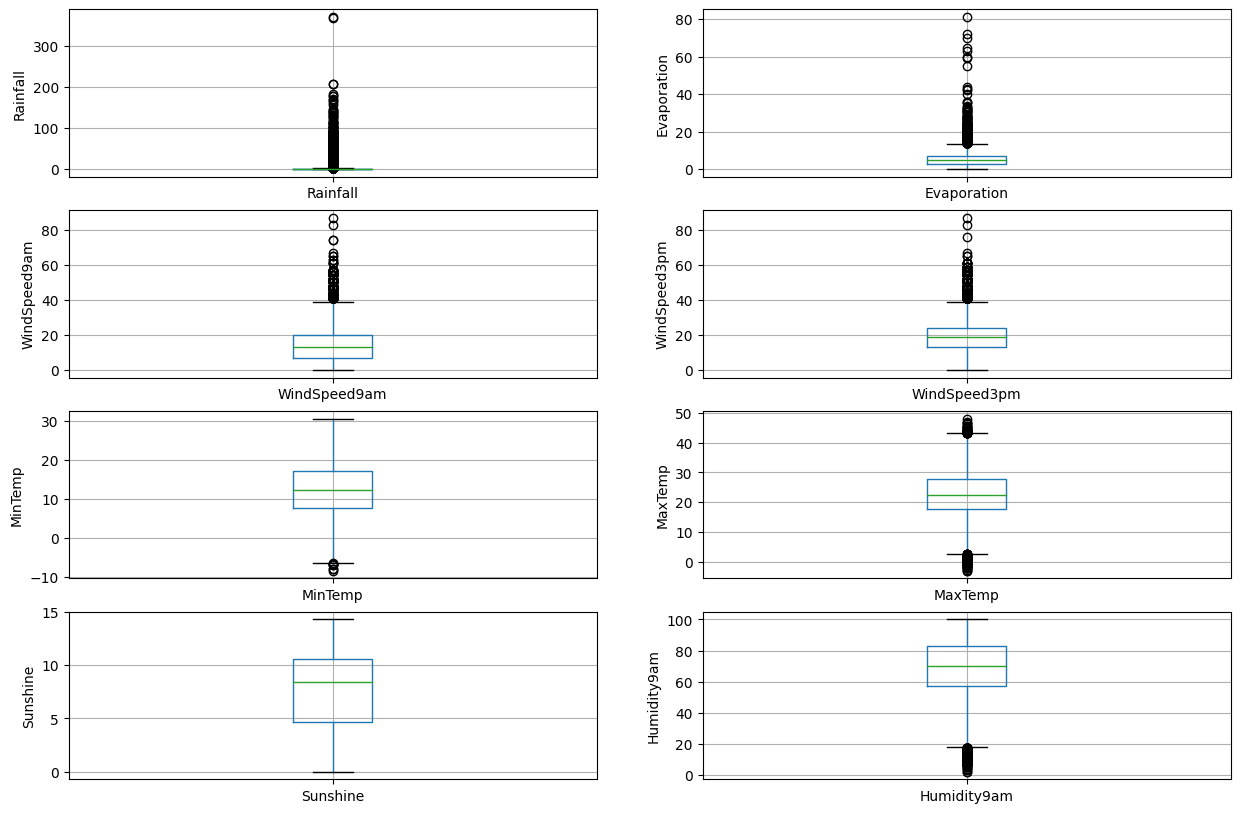

In [61]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='Sunshine')
fig.set_title('')
fig.set_ylabel('Sunshine')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='Humidity9am')
fig.set_title('')
fig.set_ylabel('Humidity9am')

Check the distribution of variables


---


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

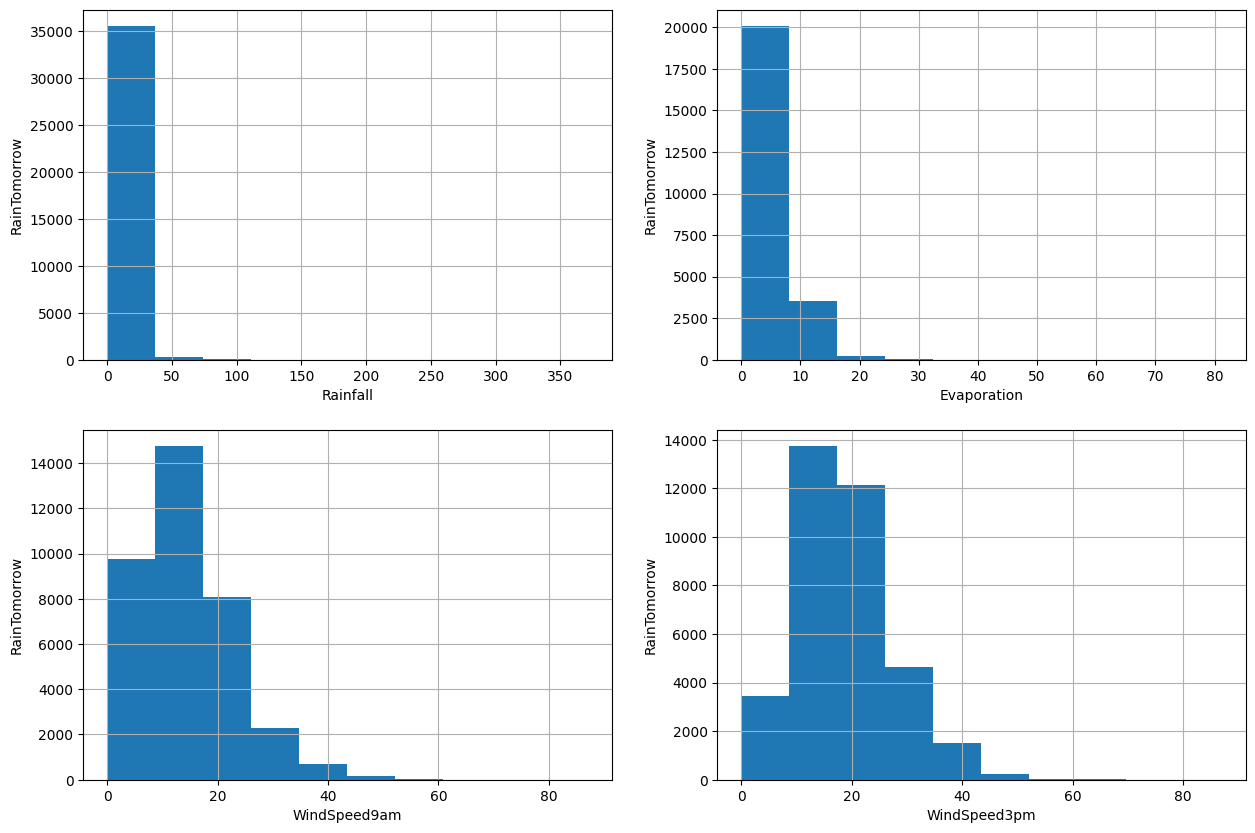

In [62]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [63]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [64]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -10.600000000000001 or > 20.200000000000003


For Evaporation, the minimum and maximum values are 0.0 and 81.0. So, the outliers are values > 20.

In [65]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -32.0 or > 59.0


For MinSpeed9am the the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 59.0.

In [66]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0

## Declaring Feature and Target Variable

In [67]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## Split data into separate training and test set

In [68]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
X_train.shape, X_test.shape

((29008, 24), (7253, 24))

## Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
First, I will display the categorical and numerical variables again separately.

In [70]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [71]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [72]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [73]:
X_train.isnull().sum()

Location             0
MinTemp            161
MaxTemp             72
Rainfall           271
Evaporation       9944
Sunshine         10603
WindGustDir       2440
WindGustSpeed     2436
WindDir9am        2112
WindDir3pm         653
WindSpeed9am       415
WindSpeed3pm       406
Humidity9am        335
Humidity3pm        293
Pressure9am       2716
Pressure3pm       2696
Cloud9am          9694
Cloud3pm         10075
Temp9am            274
Temp3pm            241
RainToday          271
Year                 0
Month                0
Day                  0
dtype: int64

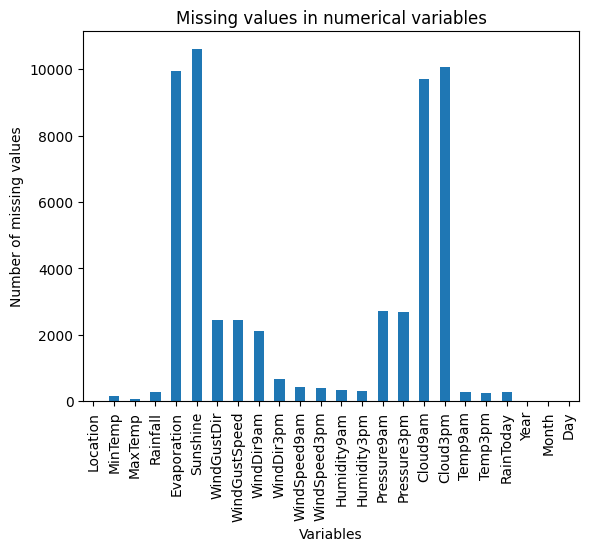

In [74]:
# plot the number of missing values for each numerical variable

X_train.isnull().sum().plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Number of missing values')
plt.title('Missing values in numerical variables')
plt.show()


In [75]:
X_test.isnull().sum()

Location            0
MinTemp            44
MaxTemp            13
Rainfall           78
Evaporation      2448
Sunshine         2552
WindGustDir       582
WindGustSpeed     579
WindDir9am        502
WindDir3pm        148
WindSpeed9am       91
WindSpeed3pm       84
Humidity9am        81
Humidity3pm        65
Pressure9am       638
Pressure3pm       632
Cloud9am         2344
Cloud3pm         2442
Temp9am            61
Temp3pm            52
RainToday          78
Year                0
Month               0
Day                 0
dtype: int64

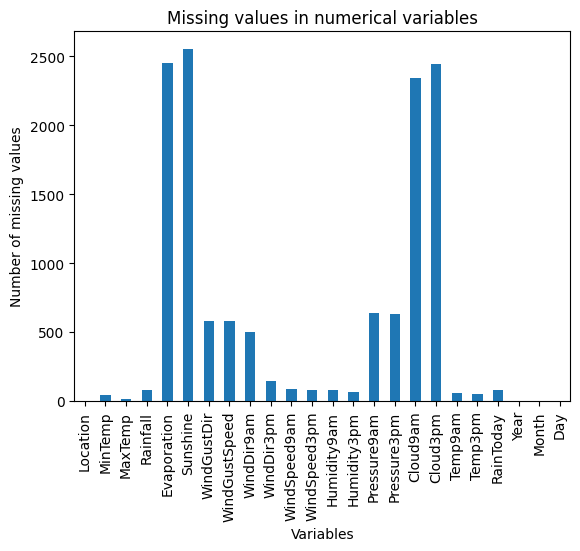

In [76]:
X_test.isnull().sum().plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Number of missing values')
plt.title('Missing values in numerical variables')
plt.show()

In [77]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0056
MaxTemp 0.0025
Rainfall 0.0093
Evaporation 0.3428
Sunshine 0.3655
WindGustSpeed 0.084
WindSpeed9am 0.0143
WindSpeed3pm 0.014
Humidity9am 0.0115
Humidity3pm 0.0101
Pressure9am 0.0936
Pressure3pm 0.0929
Cloud9am 0.3342
Cloud3pm 0.3473
Temp9am 0.0094
Temp3pm 0.0083


In [78]:
# impute missing values in X_train and X_test with respective column median in X_train
for df in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df[col].fillna(col_median, inplace=True)

In [79]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [80]:
X_train[categorical].isnull().sum()

Location          0
WindGustDir    2440
WindDir9am     2112
WindDir3pm      653
RainToday       271
dtype: int64

In [81]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.08411472697186984
WindDir9am 0.07280750137892995
WindDir3pm 0.02251103143960287
RainToday 0.009342250413678985


In [82]:
# impute missing categorical variables with most frequent value

for df in [X_train, X_test]:
    df['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [83]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [84]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Now there are no missing values in Numerical data

Next, Engineering outliers in numerical variables

We have seen that the `Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [85]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df in [X_train, X_test]:
    df['Rainfall'] = max_value(df, 'Rainfall', 3.2)
    df['Evaporation'] = max_value(df, 'Evaporation', 20)
    df['WindSpeed9am'] = max_value(df, 'WindSpeed9am', 59)
    df['WindSpeed3pm'] = max_value(df, 'WindSpeed3pm', 57)

In [86]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000
mean,12.26442,22.972711,0.710014,4.968367,7.862055,40.227144,14.182295,18.855074,69.125724,52.248311,1017.310149,1014.982963,4.541644,4.636376,16.936100,21.520608,2009.935121,6.565706,15.712562
std,6.35839,6.950590,1.208141,2.840738,3.072715,12.911948,8.898926,8.677922,18.237423,20.283297,6.843869,6.748486,2.348698,2.173440,6.375762,6.774900,0.945874,3.557334,8.798369
min,-8.50000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.500000,-3.900000,2007.000000,1.000000,1.000000
25%,7.70000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.100000,1010.700000,3.000000,3.000000,12.300000,16.500000,2009.000000,3.000000,8.000000
50%,12.10000,22.400000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.400000,1015.000000,5.000000,5.000000,16.600000,20.900000,2010.000000,7.000000,16.000000
75%,17.00000,27.900000,0.800000,5.600000,9.425000,46.000000,19.000000,24.000000,82.000000,66.000000,1021.700000,1019.300000,6.000000,6.000000,21.500000,26.200000,2011.000000,10.000000,23.000000
max,29.70000,48.100000,3.200000,20.000000,14.300000,135.000000,59.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.600000,46.100000,2012.000000,12.000000,31.000000


In [92]:
! pip install --upgrade category_encoders

Now Gonna encode the categorical variables

In [93]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [94]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
26313,Ballarat,SSE,SSE,SE,No
10041,Sydney,SE,NE,ENE,No
10554,Tuggeranong,W,NW,NW,No
24265,Sale,E,N,WSW,No
9373,NorahHead,WNW,WNW,SW,No


In [95]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [96]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
26313,Ballarat,9.1,19.4,0.0,4.6,8.4,SSE,52.0,SSE,SE,28.0,30.0,74.0,48.0,1019.1,1017.6,8.0,5.0,11.6,18.6,0,1,2012,1,14
10041,Sydney,20.5,25.1,0.0,5.2,1.0,SE,39.0,NE,ENE,20.0,15.0,72.0,83.0,1011.5,1009.6,7.0,8.0,23.9,23.5,0,1,2010,3,5
10554,Tuggeranong,23.0,34.6,0.0,4.6,8.4,W,54.0,NW,NW,11.0,17.0,71.0,44.0,1015.2,1011.8,5.0,5.0,25.2,33.2,0,1,2011,2,2
24265,Sale,12.6,41.2,0.0,7.6,12.5,E,46.0,N,WSW,6.0,9.0,77.0,19.0,1013.1,1009.6,0.0,1.0,22.1,40.2,0,1,2009,1,28
9373,NorahHead,9.6,19.5,0.0,4.6,8.4,WNW,26.0,WNW,SW,11.0,6.0,65.0,51.0,1019.9,1017.9,5.0,5.0,13.2,18.7,0,1,2009,7,31


In [97]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [98]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
26313,9.1,19.4,0.0,4.6,8.4,52.0,28.0,30.0,74.0,48.0,1019.1,1017.6,8.0,5.0,11.6,18.6,2012,1,14,0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10041,20.5,25.1,0.0,5.2,1.0,39.0,20.0,15.0,72.0,83.0,1011.5,1009.6,7.0,8.0,23.9,23.5,2010,3,5,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10554,23.0,34.6,0.0,4.6,8.4,54.0,11.0,17.0,71.0,44.0,1015.2,1011.8,5.0,5.0,25.2,33.2,2011,2,2,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
24265,12.6,41.2,0.0,7.6,12.5,46.0,6.0,9.0,77.0,19.0,1013.1,1009.6,0.0,1.0,22.1,40.2,2009,1,28,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9373,9.6,19.5,0.0,4.6,8.4,26.0,11.0,6.0,65.0,51.0,1019.9,1017.9,5.0,5.0,13.2,18.7,2009,7,31,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Tr

Similarly, I will create the X_test testing set.

In [99]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
9158,Tuggeranong,14.0,29.0,0.0,4.6,8.4,NNE,37.0,ENE,NE,9.0,17.0,67.0,40.0,1010.5,1005.2,5.0,5.0,20.7,28.2,0,1,2012,1,29
17064,Mildura,19.6,41.5,0.0,12.0,12.3,SE,26.0,E,E,15.0,11.0,28.0,8.0,1014.9,1011.9,1.0,3.0,25.9,40.0,0,1,2009,1,27
30838,Cairns,23.6,33.3,1.8,7.8,8.3,ESE,35.0,SSE,ESE,15.0,20.0,76.0,56.0,1011.5,1006.9,5.0,2.0,27.8,32.1,1,0,2010,2,12
3494,Richmond,3.1,9.5,0.0,2.2,8.4,S,17.0,N,SE,0.0,0.0,86.0,76.0,1019.7,1017.6,5.0,5.0,5.9,8.8,0,1,2011,7,13
3421,Penrith,18.9,30.4,0.0,4.6,8.4,S,57.0,N,SE,13.0,13.0,70.0,54.0,1017.4,1015.0,5.0,5.0,16.6,29.2,0,1,2010,2,28


In [100]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [101]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
9158,14.0,29.0,0.0,4.6,8.4,37.0,9.0,17.0,67.0,40.0,1010.5,1005.2,5.0,5.0,20.7,28.2,2012,1,29,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
17064,19.6,41.5,0.0,12.0,12.3,26.0,15.0,11.0,28.0,8.0,1014.9,1011.9,1.0,3.0,25.9,40.0,2009,1,27,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30838,23.6,33.3,1.8,7.8,8.3,35.0,15.0,20.0,76.0,56.0,1011.5,1006.9,5.0,2.0,27.8,32.1,2010,2,12,1,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3494,3.1,9.5,0.0,2.2,8.4,17.0,0.0,0.0,86.0,76.0,1019.7,1017.6,5.0,5.0,5.9,8.8,2011,7,13,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3421,18.9,30.4,0.0,4.6,8.4,57.0,13.0,13.0,70.0,54.0,1017.4,1015.0,5.0,5.0,16.6,29.2,2010,2,28,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

## Feature Scaling

In [102]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000
mean,12.26442,22.972711,0.710014,4.968367,7.862055,40.227144,14.182295,18.855074,69.125724,52.248311,1017.310149,1014.982963,4.541644,4.636376,16.936100,21.520608,2009.935121,6.565706,15.712562,0.231833,0.768167
std,6.35839,6.950590,1.208141,2.840738,3.072715,12.911948,8.898926,8.677922,18.237423,20.283297,6.843869,6.748486,2.348698,2.173440,6.375762,6.774900,0.945874,3.557334,8.798369,0.422010,0.422010
min,-8.50000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.500000,-3.900000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.70000,17.800000,0.000000,3.600000,7.000000,31.000000,7.000000,13.000000,58.000000,38.000000,1013.100000,1010.700000,3.000000,3.000000,12.300000,16.500000,2009.000000,3.000000,8.000000,0.000000,1.000000
50%,12.10000,22.400000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.400000,1015.000000,5.000000,5.000000,16.600000,20.900000,2010.000000,7.000000,16.000000,0.000000,1.000000
75%,17.00000,27.900000,0.800000,5.600000,9.425000,46.000000,19.000000,24.000000,82.000000,66.000000,1021.700000,1019.300000,6.000000,6.000000,21.500000,26.200000,2011.000000,10.000000,23.000000,0.000000,1.000000
max,29.70000,48.100000,3.200000,20.000000,14.300000,135.000000,59.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.600000,46.100000,2012.000000,12.000000,31.000000,1.000000,1.000000


In [103]:
cols = X_train.columns

In [104]:
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', length=115)

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [106]:
X_train

array([[0.46073298, 0.43945312, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7591623 , 0.55078125, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82460733, 0.73632812, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43193717, 0.48632812, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42146597, 0.41601562, 0.875     , ..., 0.        , 0.        ,
        0.        ],
       [0.53403141, 0.75390625, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [107]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.460733,0.439453,0.0,0.23,0.587413,0.351562,0.474576,0.526316,0.734694,0.474747,0.623064,0.629630,0.888889,0.625,0.396752,0.450,1.0,0.000000,0.433333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.759162,0.550781,0.0,0.26,0.069930,0.250000,0.338983,0.263158,0.714286,0.828283,0.492255,0.494949,0.777778,1.000,0.682135,0.548,0.6,0.181818,0.133333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.824607,0.736328,0.0,0.23,0.587413,0.367188,0.186441,0.298246,0.704082,0.434343,0.555938,0.531987,0.555556,0.625,0.712297,0.742,0.8,0.090909,0.033333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.552356,0.865234,0.0,0.38,0.874126,0.304688,0.101695,0.157895,0.765306,0.181818,0.519793,0.494949,0.000000,0.125,0.640371,0.882,0.4,0.000000,0.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.473822,0.441406,0.0,0.23,0.587413,0.148438,0.186441,0.105263,0.642857,0.505051,0.636833,0.634680,0.555556,0.625,0.433875,0.452,0.4,0.545455,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [108]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [109]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.00000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000,29008.000000
mean,0.543571,0.509233,0.221880,0.248418,0.549794,0.259587,0.240378,0.330791,0.684956,0.517660,0.592257,0.585572,0.504627,0.579547,0.520559,0.508412,0.587024,0.505973,0.490419,0.231833,0.768167,0.023132,0.022339,0.020891,0.022477,0.021477,0.022097,0.022890,0.023752,0.022063,0.029992,0.021029,0.021098,0.020270,0.02451,0.022028,0.024476,0.021477,0.023373,0.020546,0.021132,0.021994,0.021787,0.020132,0.021442,0.022201,0.020374,0.020270,0.017961,0.020305,0.02451,0.020684,0.021270,0.020684,0.020063,0.020305,0.027544,0.022304,0.021684,0.020581,0.020753,0.020167,0.020339,0.019408,0.020891,0.020098,0.021201,0.060156,0.056708,0.051986,0.062810,0.048952,0.045987,0.043126,0.052951,0.063810,0.150614,0.064637,0.057846,0.06150,0.064293,0.055192,0.059432,0.064913,0.056260,0.052468,0.149959,0.052365,0.056536,0.054330,0.055812,0.060811,0.067119,0.062707,0.051089,0.056398,0.060845,0.050262,0.048125,0.061018,0.056708,0.059570,0.060673,0.058570,0.044574,0.050779,0.059328,0.070119,0.105109,0.063017,0.054330,0.063913,0.066327,0.060397,0.065568
std,0.166450,0.135754,0.377544,0.142037,0.214875,0.100875,0.150829,0.152244,0.186096,0.204882,0.117795,0.113611,0.260966,0.271680,0.147930,0.135498,0.189175,0.323394,0.293279,0.422010,0.422010,0.150324,0.147785,0.143021,0.148230,0.144970,0.147003,0.149556,0.152278,0.146891,0.170567,0.143482,0.143712,0.140926,0.15463,0.146778,0.154524,0.144970,0.151087,0.141861,0.143827,0.146666,0.145990,0.140455,0.144856,0.147339,0.141277,0.140926,0.132810,0.141043,0.15463,0.142326,0.144285,0.142326,0.140220,0.141043,0.163665,0.147674,0.145651,0.141978,0.142558,0.140573,0.141160,0.137958,0.143021,0.140338,0.144057,0.237779,0.231289,0.222002,0.242626,0.215771

## Model Training

In [111]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=0)

log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Predicting Results

In [117]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [118]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8460


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

Next, Comparing the train-set and test-set accuracy.

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [122]:
y_pred_train = log_reg.predict(X_train)

y_pred_train

array(['No', 'Yes', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [124]:
from sklearn.metrics import accuracy_score

print('Model accuracy score on Training data: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score on Training data: 0.8475


In [125]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.8475
Test set score: 0.8460


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [126]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [128]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8487
Test set score: 0.8467


Compare model accuracy with null accuracy
So, the model accuracy is 0.8467. But, we cannot say that our model is very good based on the above accuracy.

We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [129]:
# check class distribution in test set

y_test.value_counts()

RainTomorrow
No     5557
Yes    1696
Name: count, dtype: int64

We can see that the occurences of most frequent class is 5557.

So, we can calculate null accuracy by dividing 5557 by total number of occurences.

In [131]:
# check null accuracy score

null_accuracy = (5557/(5557+1696))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7662


We can see that our model accuracy score is 0.8467 but null accuracy score is 0.7662. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called `Confusion matrix` that comes to our rescue.

In [132]:
from sklearn.metrics import confusion_matrix

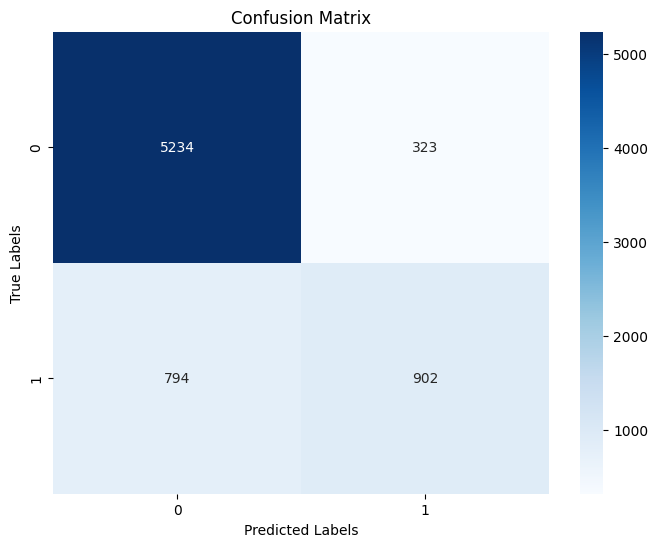

In [136]:
cm = confusion_matrix(y_test, y_pred_test)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [139]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

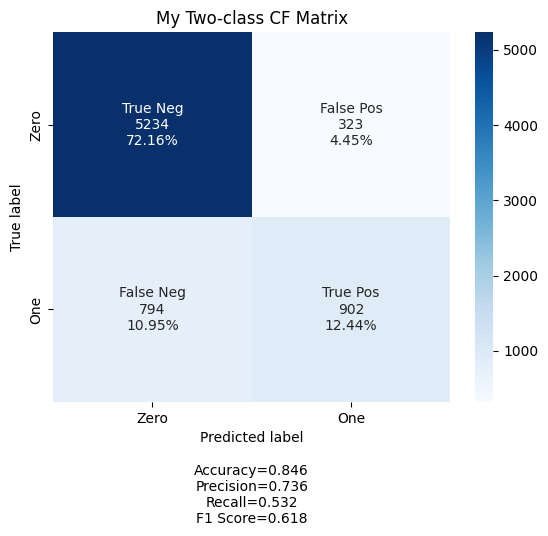

In [141]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='Blues', title='My Two-class CF Matrix')


In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.94      0.90      5557
         Yes       0.74      0.53      0.62      1696

    accuracy                           0.85      7253
   macro avg       0.80      0.74      0.76      7253
weighted avg       0.84      0.85      0.84      7253



## **Summary of Classification Report**

The classification report presents the performance metrics for a binary classification model, with classes labeled "No" and "Yes." The key metrics are precision, recall, f1-score, and support for each class, along with overall accuracy, macro average, and weighted average scores.

Class-wise Metrics:

### `Class "No":`

* Precision: 0.87

  * Indicates that 87% of the instances predicted as "No" are actually "No."

* Recall: 0.94

  * Indicates that 94% of the actual "No" instances are correctly identified by the model.

* F1-Score: 0.90
  * The harmonic mean of precision and recall, indicating a balanced performance for the "No" class.
* Support: 5557
  * The number of actual occurrences of the "No" class in the dataset.


### `Class "Yes":`

* Precision: 0.74
  * Indicates that 74% of the instances predicted as "Yes" are actually "Yes."

* Recall: 0.53
  * Indicates that 53% of the actual "Yes" instances are correctly identified by the model.

* F1-Score: 0.62
  * The harmonic mean of precision and recall, indicating a lower performance for the "Yes" class compared to the "No" class.

* Support: 1696
  * The number of actual occurrences of the "Yes" class in the dataset.

### `Overall Metrics:`
  * Accuracy: 0.85
    * The proportion of total correct predictions (both "No" and "Yes") out of all predictions.

* Macro Average:

  * Precision: 0.80
  * Recall: 0.74
  * F1-Score: 0.76
  * The unweighted average of the precision, recall, and f1-score for both classes, treating all classes equally.

* Weighted Average:

  * Precision: 0.84
  * Recall: 0.85
  * F1-Score: 0.84
  * The average of the precision, recall, and f1-score for both classes, weighted by the number of true instances for each class.




## Interpretation

1. The model performs well in identifying the "No" class, with high precision, recall, and f1-score.
2. The model's performance in identifying the "Yes" class is lower, particularly in terms of recall, suggesting that the model misses a significant number of "Yes" instances.
3. The overall accuracy is high at 85%, but the lower recall for the "Yes" class indicates room for improvement in detecting this class.
4. The macro and weighted averages provide additional insight into the model's balanced and weighted performance across both classes.